In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 4.1 MB/s 
     |████████████████████████████████| 46 kB 2.7 MB/s 
     |████████████████████████████████| 186 kB 51.9 MB/s 
     |████████████████████████████████| 1.2 MB 33.0 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 51 kB 283 kB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

In [3]:
from fastai.collab import *
from fastai.tabular.all import *
path = untar_data(URLs.ML_100k)

In [4]:
path.ls()

(#23) [Path('/root/.fastai/data/ml-100k/u2.test'),Path('/root/.fastai/data/ml-100k/u5.test'),Path('/root/.fastai/data/ml-100k/ua.test'),Path('/root/.fastai/data/ml-100k/u.item'),Path('/root/.fastai/data/ml-100k/README'),Path('/root/.fastai/data/ml-100k/u5.base'),Path('/root/.fastai/data/ml-100k/ub.base'),Path('/root/.fastai/data/ml-100k/u.data'),Path('/root/.fastai/data/ml-100k/u4.base'),Path('/root/.fastai/data/ml-100k/u.occupation')...]

In [5]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None, names=['user', 'movie', 'rating', 'timestamp'])
ratings.head()

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:

movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None)
movies = movies[[0, 1]]
movies.columns = ['movie', 'title']
movies.head()

,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
rating_movies = ratings['movie']
movies_movies = movies['movie']
rating_movies[~rating_movies.isin(movies_movies)], movies_movies[~movies_movies.isin(rating_movies)]

(Series([], Name: movie, dtype: int64), Series([], Name: movie, dtype: int64))

In [8]:
ratings = ratings.merge(movies, on="movie")
ratings.head()

,user,movie,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [9]:
ratings.drop(labels="timestamp", axis=1, inplace=True)

In [10]:
ratings.head()

,user,movie,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


In [44]:
dls = CollabDataLoaders.from_df(ratings, item_name="title", bs=128)
dls.show_batch()

,user,title,rating
0,125,"Great Escape, The (1963)",5
1,370,Brazil (1985),3
2,604,"Birds, The (1963)",3
3,385,"Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)",4
4,327,Indiana Jones and the Last Crusade (1989),3
5,342,Men in Black (1997),2
6,716,Pollyanna (1960),3
7,298,Apollo 13 (1995),4
8,385,Being There (1979),4
9,161,"Silence of the Lambs, The (1991)",4


In [45]:
x, y = dls.one_batch()
x.shape, y.shape

(torch.Size([128, 2]), torch.Size([128, 1]))

In [46]:
x

tensor([[ 838,  529],
        [ 842,  524],
        [ 290, 1658],
        [ 659, 1374],
        [ 606, 1245],
        [ 835,   45],
        [ 624,  946],
        [ 472,  236],
        [ 498, 1525],
        [ 125,  415],
        [   5,  416],
        [ 894, 1258],
        [  42,  329],
        [ 622, 1244],
        [ 102, 1049],
        [ 474,  185],
        [ 739,  794],
        [ 450, 1249],
        [ 344,   93],
        [ 198,  476],
        [ 864,  592],
        [ 385, 1261],
        [ 248,  226],
        [ 770, 1348],
        [ 885,  134],
        [ 394, 1206],
        [ 307,  143],
        [ 261,  539],
        [ 301, 1302],
        [ 291,   84],
        [ 373,  742],
        [ 703,  346],
        [   4, 1302],
        [ 586,  275],
        [ 715, 1396],
        [  75,  213],
        [ 448,  580],
        [ 294,  294],
        [ 735,  506],
        [ 592, 1038],
        [ 711, 1285],
        [   6,  302],
        [ 648, 1031],
        [  44,  668],
        [ 405, 1499],
        [ 

In [47]:
dls.classes

{'title': ['#na#', "'Til There Was You (1997)", '1-900 (1994)', '101 Dalmatians (1996)', '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)', '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)', '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)', '8 1/2 (1963)', '8 Heads in a Duffel Bag (1997)', '8 Seconds (1994)', 'A Chef in Love (1996)', 'Above the Rim (1994)', 'Absolute Power (1997)', 'Abyss, The (1989)', 'Ace Ventura: Pet Detective (1994)', 'Ace Ventura: When Nature Calls (1995)', 'Across the Sea of Time (1995)', 'Addams Family Values (1993)', 'Addicted to Love (1997)', 'Addiction, The (1995)', 'Adventures of Pinocchio, The (1996)', 'Adventures of Priscilla, Queen of the Desert, The (1994)', 'Adventures of Robin Hood, The (1938)', 'Affair to Remember, An (1957)', 'African Queen, The (1951)', 'Afterglow (1997)', 'Age of Innocence, The (1993)', 'Aiqing wansui (1994)', 'Air Bud (1997)', 'Air Force One (1997)', 'Air Up There, The (199

In [12]:
# get the number of movies and users to account for
n_movies = len(dls.classes['movie'])
n_users = len(dls.classes['user'])
n_movies, n_users

(1650, 944)

In [34]:
# create a simple implemenation of the dot product model and train for a few epochs
class SimpleDotProd(Module):
  def __init__(self, n_users, n_movies, n_factors):
    self.users = Embedding(n_users, n_factors)
    self.movies = Embedding(n_movies, n_factors)
  
  def forward(self, x):
    # get the users in column one of the passed input and movies in column2 
    curr_users = self.users(x[:, 0])
    curr_movies = self.movies(x[:, 1])
    # compute dot prod by multiplying embeddings and summing over columns
    return (curr_users * curr_movies).sum(axis=1)

In [35]:
simple_collab = SimpleDotProd(n_users, n_movies, 100)
learn = Learner(dls, simple_collab, loss_func=MSELossFlat())
learn.model

SimpleDotProd(
  (users): Embedding(944, 100)
  (movies): Embedding(1650, 100)
)

In [36]:
learn.fit_one_cycle(4, 1e-3)

epoch,train_loss,valid_loss,time
0,8.621649,6.716273,00:05
1,1.406145,1.370120,00:05
2,1.055187,1.106433,00:05
3,0.987696,1.083009,00:05


In [58]:
# create model using bias term and y range
class DotProd(Module):
  def __init__(self, n_users, n_movies, n_factors, y_range=(0, 5.5)):
    # intialize the dot product class as before and add a bias term for each user/movie
    self.users = Embedding(n_users, n_factors)
    self.user_bias = Embedding(n_users, 1)
    self.movies = Embedding(n_movies, n_factors)
    self.movie_bias = Embedding(n_movies, 1)

    self.y_range = y_range

  
  def forward(self, x):
    res = torch.unsqueeze((self.users(x[:, 0]) * self.movies(x[:, 1])).sum(axis=1), 1)
    res += self.user_bias(x[:, 0]) + self.movie_bias(x[:, 1])
    # apply sigmoid range to the result
    return (torch.sigmoid(res) * (self.y_range[1] - self.y_range[0])) + self.y_range[0]


In [59]:
dot_prod = DotProd(n_users, n_movies, 100)
learn = Learner(dls, dot_prod, loss_func=MSELossFlat())
learn.model

DotProd(
  (users): Embedding(944, 100)
  (user_bias): Embedding(944, 1)
  (movies): Embedding(1650, 100)
  (movie_bias): Embedding(1650, 1)
)

In [60]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,time
0,1.475194,1.349025,00:06
1,0.916884,0.922512,00:06
2,0.850928,0.875475,00:06
3,0.770010,0.862101,00:06
4,0.762909,0.860268,00:06


SuggestedLRs(valley=0.007585775572806597)

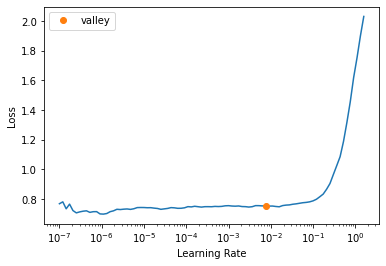

In [61]:
# try to continue training with weight decay to see if model generalizes better
learn.lr_find()

In [62]:
learn.fit_one_cycle(5, 0.0076, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.837420,0.919809,00:06
1,0.735508,0.905930,00:06
2,0.467221,0.905765,00:06
3,0.245613,0.907086,00:06
4,0.124504,0.908399,00:06


SuggestedLRs(valley=0.02290867641568184)

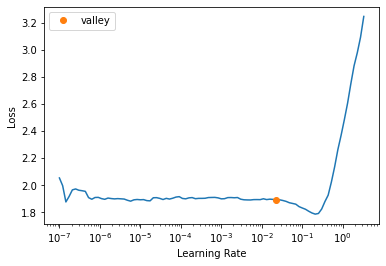

In [63]:
dot_prod = DotProd(n_users, n_movies, 100)
learn = Learner(dls, dot_prod, loss_func=MSELossFlat())
learn.lr_find()

In [64]:
learn.fit_one_cycle(5, 0.0223, wd=0.1)

epoch,train_loss,valid_loss,time
0,1.163044,1.180286,00:06
1,1.166652,1.199257,00:06
2,0.920453,1.030525,00:06
3,0.535174,0.906713,00:06
4,0.214482,0.901263,00:05


SuggestedLRs(valley=0.0005754399462603033)

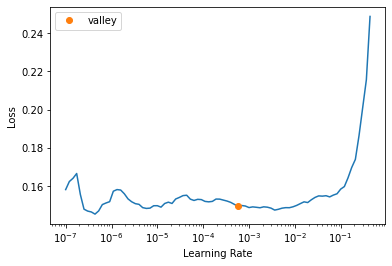

In [65]:
learn.lr_find()

In [66]:
learn.fit_one_cycle(5, 0.0005754, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.160092,0.902414,00:06
1,0.151556,0.906735,00:06
2,0.132239,0.911519,00:05
3,0.114542,0.914114,00:06
4,0.101776,0.914510,00:06


## Creating own embeddings

In [15]:
def create_params(size):
  # create parameters by spreading the size tuple and creating a mean of zero with std of 0.1
  return nn.Parameter(torch.randn(*size).normal_(mean=0, std=0.1))

create_params((10, 2))

Parameter containing:
tensor([[-0.0996,  0.0507],
        [-0.1147, -0.0677],
        [-0.1011, -0.0125],
        [-0.0605,  0.0124],
        [ 0.0882,  0.0124],
        [-0.0999, -0.0291],
        [ 0.0108,  0.0807],
        [ 0.0666, -0.0467],
        [ 0.0007,  0.0650],
        [ 0.0074, -0.0899]], requires_grad=True)

In [17]:
class FullDotProd(Module):
  def __init__(self, n_users, n_movies, n_factors, y_range = (0, 5.5)):
    self.users = create_params((n_users, n_factors))
    self.user_bias = create_params((n_users, 1))
    self.movies = create_params((n_movies, n_factors))
    self.movie_bias = create_params((n_movies, 1))
    
    self.y_range = y_range

  
  def forward(self, x):
    res = (self.users[x[:, 0]] * self.movies[x[:, 1]]).sum(dim=1, keepdim=True)
    res += self.user_bias[x[:, 0]] + self.movie_bias[x[:, 1]]
    return (torch.sigmoid(res) * (self.y_range[1] - self.y_range[0])) + self.y_range[0]

In [18]:
model = FullDotProd(n_users, n_movies, 100)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.model

FullDotProd()

In [19]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,time
0,1.661554,1.633089,00:06
1,1.147479,1.184405,00:06
2,0.870065,1.013286,00:06
3,0.749579,0.976903,00:06
4,0.683211,0.972522,00:06


## Deep learning for collaborative filtering

In [28]:
class CollabNN(Module):
  def __init__(self, user_size, movie_size, y_range=(0, 5.5)):
    self.users = Embedding(*user_size)
    self.movies = Embedding(*movie_size)
    self.y_range = y_range

    self.layers = nn.Sequential(
        # first layer takes the size of the input (the number of columns of each embedding vector of user and movie added)
        nn.Linear(user_size[1] + movie_size[1], 125),
        nn.ReLU(),
        # convert 125 inputs into  a single output layer
        nn.Linear(125, 1)
    )
  

  def forward(self, x):
    # concatenate the inputs to pass to the nn
    users = self.users(x[:, 0])
    movies = self.movies(x[:, 1])
    inputs = torch.cat([users, movies], dim=1)
    res = self.layers(inputs)
    return sigmoid_range(res, *self.y_range)

In [29]:
# use fast ai to find appropriate sizes for users and movies
emb_size = get_emb_sz(dls)
emb_size

[(944, 74), (1650, 101)]

In [30]:
nn_model = CollabNN(*emb_size)
learn = Learner(dls, nn_model, loss_func=MSELossFlat())
learn.model

CollabNN(
  (users): Embedding(944, 74)
  (movies): Embedding(1650, 101)
  (layers): Sequential(
    (0): Linear(in_features=175, out_features=125, bias=True)
    (1): ReLU()
    (2): Linear(in_features=125, out_features=1, bias=True)
  )
)

In [31]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,time
0,0.918586,0.933376,00:07
1,0.888286,0.898688,00:07
2,0.856509,0.881540,00:07
3,0.818383,0.874967,00:07
4,0.781885,0.876267,00:07


In [32]:
nn_model = CollabNN(*emb_size)
learn = Learner(dls, nn_model, loss_func=MSELossFlat())
# retrain using weight decay and check if there is a difference
learn.fit_one_cycle(5, 1e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.936109,0.934049,00:07
1,0.886501,0.905881,00:07
2,0.880619,0.882247,00:07
3,0.815115,0.874502,00:07
4,0.797620,0.874926,00:07


## Using Fastai Collab

In [33]:
learn = collab_learner(dls, use_nn=True, y_range=(0, 5.5), layers=[100,50])
learn.loss_func

FlattenedLoss of MSELoss()

In [34]:
learn.model

EmbeddingNN(
  (embeds): ModuleList(
    (0): Embedding(944, 74)
    (1): Embedding(1650, 101)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=175, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=100, out_features=50, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=50, out_features=1, bias=True)
    )
    (3): SigmoidRange(low=0, high=5.5)
  )
)

In [35]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.964033,0.984079,00:08
1,0.897799,0.923623,00:08
2,0.883310,0.885845,00:08
3,0.827771,0.858173,00:08
4,0.724639,0.866397,00:08


## Now, test a fast ai dot product learner

In [36]:
learn = collab_learner(dls, n_factors=100, y_range=(0, 5.5))
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 100)
  (i_weight): Embedding(1650, 100)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1650, 1)
)

In [37]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.970410,0.951005,00:07
1,0.807266,0.861226,00:07
2,0.606058,0.842321,00:06
3,0.382833,0.847250,00:07
4,0.269630,0.849143,00:07


## Interpret bias
- Interpreting embeddings will be done more in the next notebook

In [40]:
dp_model = FullDotProd(n_users, n_movies, 100)
learn_2 = Learner(dls, dp_model, loss_func=MSELossFlat())
learn_2.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,time
0,1.694129,1.635386,00:06
1,1.176235,1.189933,00:06
2,0.856750,1.014649,00:06
3,0.726451,0.974483,00:06
4,0.682024,0.969663,00:06


In [48]:
dls.classes['title']

['#na#', "'Til There Was You (1997)", '1-900 (1994)', '101 Dalmatians (1996)', '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)', '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)', '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)', '8 1/2 (1963)', '8 Heads in a Duffel Bag (1997)', '8 Seconds (1994)', 'A Chef in Love (1996)', 'Above the Rim (1994)', 'Absolute Power (1997)', 'Abyss, The (1989)', 'Ace Ventura: Pet Detective (1994)', 'Ace Ventura: When Nature Calls (1995)', 'Across the Sea of Time (1995)', 'Addams Family Values (1993)', 'Addicted to Love (1997)', 'Addiction, The (1995)', 'Adventures of Pinocchio, The (1996)', 'Adventures of Priscilla, Queen of the Desert, The (1994)', 'Adventures of Robin Hood, The (1938)', 'Affair to Remember, An (1957)', 'African Queen, The (1951)', 'Afterglow (1997)', 'Age of Innocence, The (1993)', 'Aiqing wansui (1994)', 'Air Bud (1997)', 'Air Force One (1997)', 'Air Up There, The (1994)', 'Airh

In [50]:
# get the best and wost movies from the dot prod model according to bias rating
movie_bias = learn_2.model.movie_bias.squeeze()
bad_movie_id = movie_bias.argsort()[:5]
good_movie_id = movie_bias.argsort(descending=True)[:5]
[dls.classes['title'][i] for i in bad_movie_id], [dls.classes['title'][i] for i in good_movie_id]

(['Lost in Space (1998)',
  'Touch (1997)',
  'Further Gesture, A (1996)',
  'Low Down Dirty Shame, A (1994)',
  'Jurassic Park (1993)'],
 ['Arsenic and Old Lace (1944)',
  'Alphaville (1965)',
  'Cinema Paradiso (1988)',
  'Fear (1996)',
  'Exit to Eden (1994)'])